In [1]:
##if using Anaconda (on Anaconda terminal)
#conda install -c conda-forge xgboost 
#pip install xgboost

import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)


You should consider upgrading via the 'c:\Users\greg\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
from sklearn.exceptions import ConvergenceWarning
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing import split_X_y
from model_optimization import optimize_one_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'data')

## Import Labeled Data

In [3]:
#data = pd.read_csv(os.path.join(DATA_DIR, 'ind4_clustering_results.csv.gz'), compression='gzip')
data = pd.read_csv(os.path.join(DATA_DIR, 'ind4_clustering_results_var_genes.csv.gz'), compression='gzip')
data

,ORM1,ORM2,MMP3,FDCSP,S100A7,FABP7,KRT81,DCN,IL1B,AREG,...,MRGPRX4,C2CD4B,CTD.2012K14.8,CCR10,FAS,ADORA2B,PRMT9,PHGDH,HOXA4,cluster_label
0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,B
1,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.159752,1.159752,0.0,0.000000,0.0,B
2,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,L1
3,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.231624,0.000000,...,0.0,0.0,0.0,0.0,1.231624,0.000000,0.0,0.962358,0.0,B
4,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.198887,0.0,L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,0.00000,0.000000,0.000000,0.0,0.000000,1.382332,3.756037,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.382332,0.0,L1
4010,0.00000,0.000000,3.002545,0.0,0.000000,0.000000,0.000000,0.0,1.139851,1.139851,...,0.0,0.0,0.0,0.0,1.139851,0.000000,0.0,0.000000,0.0,B
4011,0.00000,0.000000,0.000000,0.0,1.729568,1.199697,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,L1
4012,2.44477,2.946953,0.000000,0.0,2.142408,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.388285,0.000000,0.0,0.000000,0.0,L2


L1              1931
B               1429
L2               572
Unclassified      82
Name: cluster_label, dtype: int64


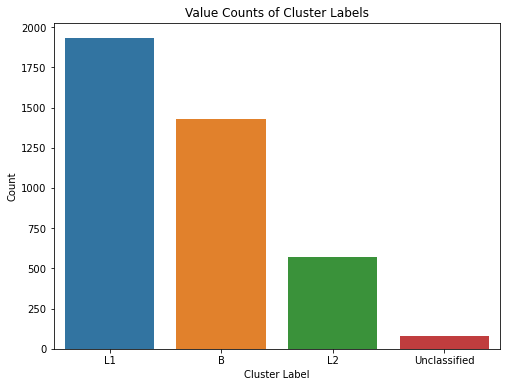

In [4]:
cluster_counts = data['cluster_label'].value_counts()
print(cluster_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Value Counts of Cluster Labels')
plt.show()

In [5]:
data.describe()

,ORM1,ORM2,MMP3,FDCSP,S100A7,FABP7,KRT81,DCN,IL1B,AREG,...,RP11.597D13.9,MRGPRX4,C2CD4B,CTD.2012K14.8,CCR10,FAS,ADORA2B,PRMT9,PHGDH,HOXA4
count,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,...,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000
mean,0.142191,0.084910,0.297772,0.065054,0.488509,0.199051,0.159551,0.034415,0.279810,0.315602,...,0.004128,0.004331,0.004275,0.004063,0.004464,0.240907,0.068786,0.024694,0.412100,0.034093
std,0.696116,0.485980,0.856380,0.414117,1.078162,0.655485,0.587791,0.346617,0.779161,0.762863,...,0.066658,0.068425,0.069848,0.066387,0.072764,0.494458,0.261867,0.155206,0.592806,0.180004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.877524,0.000000
max,6.762612,5.539486,6.572284,4.903337,5.591136,4.861639,5.166052,5.812831,5.654543,4.846035,...,1.493988,1.604655,1.778140,1.709633,1.842913,2.938584,1.879372,2.390354,2.622593,2.246530


In [6]:
zeros_count = (data == 0).sum()
print(zeros_count)

ORM1             3749
ORM2             3857
MMP3             3421
FDCSP            3883
S100A7           3103
                 ... 
ADORA2B          3729
PRMT9            3904
PHGDH            2538
HOXA4            3858
cluster_label       0
Length: 2001, dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Columns: 2001 entries, ORM1 to cluster_label
dtypes: float64(2000), object(1)
memory usage: 61.3+ MB


## PreProcessing

Split X, y and turn labels from string to int with values in range (0, n_classes-1). Also isolate a 30% part of the data as a hold out test set, that will be used to test the generalization ability of the final model.

In [7]:
data = data[~data['cluster_label'].str.contains('Unclassified')]
data = data.reset_index(drop=True)

In [9]:
X, y = split_X_y(data)
X


,ORM1,ORM2,MMP3,FDCSP,S100A7,FABP7,KRT81,DCN,IL1B,AREG,...,RP11.597D13.9,MRGPRX4,C2CD4B,CTD.2012K14.8,CCR10,FAS,ADORA2B,PRMT9,PHGDH,HOXA4
0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.159752,1.159752,0.0,0.000000,0.0
2,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.231624,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.231624,0.000000,0.0,0.962358,0.0
4,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.198887,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,0.00000,0.000000,0.000000,0.0,0.000000,1.382332,3.756037,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.382332,0.0
3928,0.00000,0.000000,3.002545,0.0,0.000000,0.000000,0.000000,0.0,1.139851,1.139851,...,0.0,0.0,0.0,0.0,0.0,1.139851,0.000000,0.0,0.000000,0.0
3929,0.00000,0.000000,0.000000,0.0,1.729568,1.199697,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3930,2.44477,2.946953,0.000000,0.0,2.142408,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.388285,0.000000,0.0,0.000000,0.0


In [10]:
y = pd.DataFrame(y)
y

,0
0,0
1,0
2,1
3,0
4,1
...,...
3927,1
3928,0
3929,1
3930,2


In [209]:
#X = X + 0.01

In [11]:
# create held-out test set for final model testing
X, X_test, y, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y, shuffle=True)

In [12]:
# reset indices
X = X.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y = y.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [13]:
y = y.to_numpy()  
y_test = y_test.to_numpy()  

In [14]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(2752, 2000)
(1180, 2000)
(2752, 1)
(1180, 1)


In [15]:
X_test

,ORM1,ORM2,MMP3,FDCSP,S100A7,FABP7,KRT81,DCN,IL1B,AREG,...,RP11.597D13.9,MRGPRX4,C2CD4B,CTD.2012K14.8,CCR10,FAS,ADORA2B,PRMT9,PHGDH,HOXA4
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.287289,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,1.040570,1.040570,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.167167,0.0,0.000000,0.744999,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.744999,0.0
3,0.000000,0.000000,0.992541,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0.000000,0.000000,0.585273,0.0,0.000000,0.585273,0.000000,0.0,0.000000,0.585273,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.585273,0.0
1176,0.000000,0.000000,1.198240,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.198240,0.0,0.0,1.198240,0.0
1177,3.884666,0.745814,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1178,0.000000,0.000000,0.000000,0.0,2.663829,0.000000,0.000000,0.0,0.636617,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [16]:
y_test


array([[0],
       [0],
       [1],
       ...,
       [2],
       [1],
       [2]])

## NestedCV to optimize each model and compare them

In [23]:
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score, fbeta_score, f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import numpy as np

NUM_TRIALS = 5
OUTER_FOLDS = 2

scoring = {'F1_weighted': make_scorer(f1_score, average='weighted'),
           'F1_micro': make_scorer(f1_score, average='micro'),
           'F1_macro': make_scorer(f1_score, average='macro'),
           'F2_weighted': make_scorer(fbeta_score, beta=2, zero_division=0, average='weighted'),
           'F2_micro': make_scorer(fbeta_score, beta=2, zero_division=0, average='micro'),
           'F2_macro': make_scorer(fbeta_score, beta=2, zero_division=0, average='macro'),
           'MCC': make_scorer(matthews_corrcoef),
           'Balanced_Accuracy': 'balanced_accuracy',
           }

def get_outer_scores(y_true, y_pred, results_df, idx):
    """
    Fill the dataframe which will contain all the scores for each experiment of a specific classifier

    :param y_true: True labels
    :param y_pred: Predicted labels by the best estimator of each inner cv
    :param results_df: The dataframe to fill
    :param idx: The index the results should be put
    :return: The dataframe filled at the indicated index
    """
    results_df['MCC'].loc[idx] = matthews_corrcoef(y_true, y_pred)
    results_df['F1_weighted'].loc[idx] = f1_score(y_true, y_pred, average='weighted')
    results_df['F1_micro'].loc[idx] = f1_score(y_true, y_pred, average='micro')
    results_df['F1_macro'].loc[idx] = f1_score(y_true, y_pred, average='macro')
    results_df['F2_weighted'].loc[idx] = fbeta_score(y_true, y_pred, beta=2, zero_division=0, average='weighted')
    results_df['F2_micro'].loc[idx] = fbeta_score(y_true, y_pred, beta=2, zero_division=0, average='micro')
    results_df['F2_macro'].loc[idx] = f1_score(y_true, y_pred, average='macro')
    results_df['Balanced_Accuracy'].loc[idx] = balanced_accuracy_score(y_true, y_pred)

    return results_df.copy()

def run_ncv(data_x, labels, clf_name):
    """
    Run an NCV experiment for a specific classifier whose name is required as input

    :param data_x: Dataframe of samples and features
    :param labels: numpy array of labels
    :param clf_name: a string indicating the name of the classifier
    :return: tuple
        Result scores of all experiments in a dataframe (experiment_number x score) and a list with the best parameters
        for each experiment just for inspection (DO NOT USE)
    """
    trial_results_df = pd.DataFrame(columns=list(scoring.keys()), index=[i for i in range(NUM_TRIALS+OUTER_FOLDS)])
    best_params_list = []
    svd = TruncatedSVD(n_components=2).fit(data_x)
    
    for num_trial in range(NUM_TRIALS):
        outer_cv = StratifiedKFold(n_splits=OUTER_FOLDS, shuffle=True, random_state=num_trial)
        count = 0
        for train_ix, test_ix in outer_cv.split(data_x, labels):
            x_train, x_test = data_x.loc[train_ix], data_x.loc[test_ix]
            y_train, y_test = labels[train_ix], labels[test_ix]

            
            x_train = svd.transform(x_train)
            x_test = svd.transform(x_test)

            seed = num_trial

            best_estimator, best_params = optimize_one_model(x_train, y_train, clf_name, seed)

            best_params_list.append(best_params)
            y_pred = best_estimator.predict(x_test)
            trial_results_df = get_outer_scores(y_test, y_pred, trial_results_df.copy(), num_trial+count)
            
            count += 1

    return trial_results_df, best_params_list



def run_all_classifiers(data, targets):
    """
    START HERE
    Begin the nested cv experiment here. This function iterates over all classifier names and starts a ncv experiment for
    each one.

    :param data: A dataframe containing the features for all available samples (aka PCs)
    :param targets: The labels after turning them into numbers of range 0 to num_classes-1
    :return: Tuple
        A dictionary with keys the names of the classifiers and values the dataframes containing the scores for each,
        A dictionary containing the best params for each experiment and each classifier (Only used for inspection)
    """
    results_dict = {}
    params_dict = {}
    classifiers = {0: 'svm',
                   1: 'lr',
                   2: 'gnb',
                   3: 'rf',
                   4: 'xgb'
                   }

    for clf in classifiers.values():
        print(f'Starting NCV experiment for classifier {clf}')
        # res_df = nested_cv(clf, hyperparam_grids[key], x, y)
        res_df, best_params = run_ncv(data, targets, clf)
        results_dict[clf] = res_df
        params_dict[clf] = best_params
        # break
    return results_dict, params_dict

## Plotting functions

In [18]:
def plot_clfs_metrics(results_dict):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(6, 9))
    my_palette = sns.color_palette("Set3")

    row, col = 0, 0
    for metric in scoring.keys():
        metric_data = pd.DataFrame()
        for clf_key, df in results_dict.items():
            metric_data[clf_key.upper()] = df[metric]
        sns.boxplot(data=metric_data, ax=axes[row][col], width=0.5, palette=my_palette)
        axes[row][col].set_title(metric)

        col += 1
        if col == 2:
            col = 0
            row += 1

    fig.subplots_adjust(hspace=0.6, wspace=0.3)
    fig.suptitle('Classifiers metrics comparison after nested CV experiments', fontsize=22)
    plt.savefig('metrics_comparison.pdf')
    plt.show()


def plot_mccs(mcc_dict):
    fig, ax = plt.subplots(figsize=(8, 7))
    x_labels = [key.upper() for key in mcc_dict.keys()]
    y_values = mcc_dict.values()
    my_cmap = plt.get_cmap("Set3")
    plt.bar(x_labels, y_values, color=my_cmap.colors)
    plt.title('MCC mean values comparison between different classifiers', fontsize=22)
    ax.xaxis.label.set_size(8)
    ax.yaxis.label.set_size(8)
    ax.bar_label(ax.containers[0])
    plt.xlabel('Classifiers', fontsize=10)
    plt.savefig('mcc_compare.pdf')
    plt.show()


def plot_mean_std_errors(std_dict):
    fig, ax = plt.subplots(figsize=(8, 7))
    x_labels = [key.upper() for key in std_dict.keys()]
    y_values = std_dict.values()
    my_cmap = plt.get_cmap("Set3")
    plt.bar(x_labels, y_values, color=my_cmap.colors)
    plt.title('MCC standard error comparison between different classifiers', fontsize=22)
    ax.xaxis.label.set_size(8)
    ax.yaxis.label.set_size(8)
    ax.bar_label(ax.containers[0])
    plt.xlabel('Classifiers', fontsize=10)
    plt.savefig('std_e_compare.pdf')
    plt.show()


def compare_mean_mccs(results_dict):
    """
    For each classifier calculate mean MCC score and standard error
    :param results_dict: A dictionary with keys the names of the classifiers and values dataframes with the scores of
    the ncv experiments done for each one
    :return:
    Dictionary for each classifier's mean MCC score
    """
    mccs = {}
    std_errors = {}
    for key, df in results_dict.items():
        mean_mcc = df['MCC'].mean()
        std_error_mcc = df['MCC'].std(ddof=1) / np.sqrt(df['MCC'].shape[0])
        mccs[key] = mean_mcc
        std_errors[key] = std_error_mcc
    plot_mccs(mccs)
    plot_mean_std_errors(std_errors)
    return mccs

In [233]:
X.shape

(2752, 2000)

In [257]:
X.loc[[0,1,2,3]]


,ORM1,ORM2,MMP3,FDCSP,S100A7,FABP7,KRT81,DCN,IL1B,AREG,...,RP11.597D13.9,MRGPRX4,C2CD4B,CTD.2012K14.8,CCR10,FAS,ADORA2B,PRMT9,PHGDH,HOXA4
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4.527878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.581540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.554186,3.737693,0.0,0.881214,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
results, params_dict = run_all_classifiers(X,y)

Starting NCV experiment for classifier svm


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Starting NCV experiment for classifier lr


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Starting NCV experiment for classifier gnb


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Starting NCV experiment for classifier rf


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Starting NCV experiment for classifier xgb


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [25]:
for key, value in params_dict.items():
    print(f'Params for classifier {key}')
    for idx, param in enumerate(value):
        print(f'Params of trial {idx}: {param}')

Params for classifier svm
Params of trial 0: {'c_svm': 0.13811065693940555, 'gamma_svm': 0.012442378456651797}
Params of trial 1: {'c_svm': 0.1627869490597891, 'gamma_svm': 0.006296786430205923}
Params of trial 2: {'c_svm': 0.49690201008456486, 'gamma_svm': 0.008121405780586762}
Params of trial 3: {'c_svm': 0.16405470189312965, 'gamma_svm': 0.01120283810219958}
Params of trial 4: {'c_svm': 0.29324636706047685, 'gamma_svm': 0.04216494031537662}
Params of trial 5: {'c_svm': 0.7966058023255878, 'gamma_svm': 0.012541462164870855}
Params of trial 6: {'c_svm': 0.08376438887772554, 'gamma_svm': 0.02880701642778729}
Params of trial 7: {'c_svm': 0.07287237220976257, 'gamma_svm': 0.14009950991701864}
Params of trial 8: {'c_svm': 0.19950292598312605, 'gamma_svm': 0.01612162087254015}
Params of trial 9: {'c_svm': 0.9691020843229311, 'gamma_svm': 0.02276279438064294}
Params for classifier lr
Params of trial 0: {'lr_solver': 'lbfgs', 'lr_c': 0.32374009529257236}
Params of trial 1: {'lr_solver': 'new

## Check MCC scores to compare algorithms

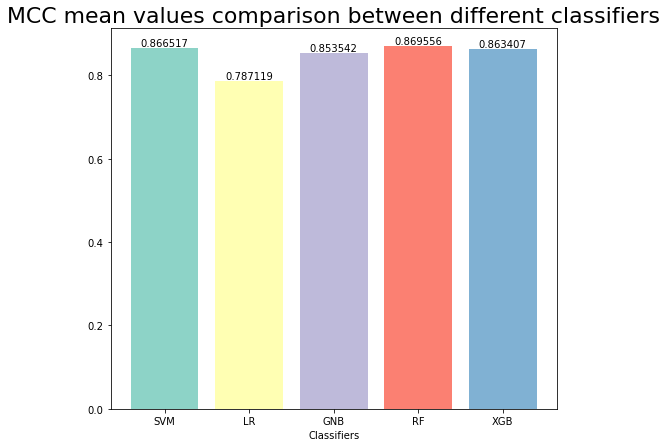

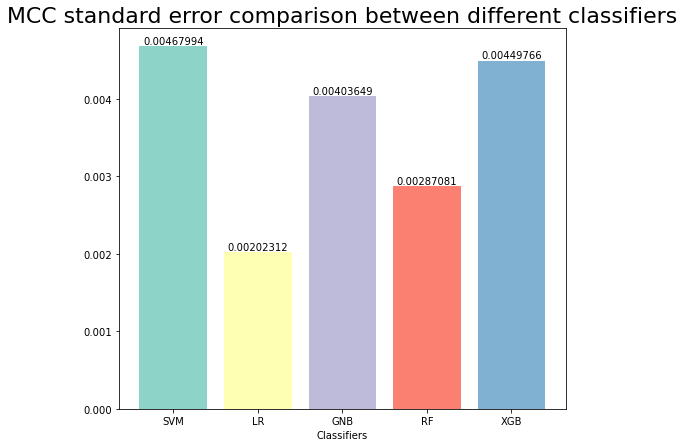

{'svm': 0.8665167137603663,
 'lr': 0.7871185864999827,
 'gnb': 0.8535424600832567,
 'rf': 0.8695555782499466,
 'xgb': 0.8634067428462041}

In [26]:
mccs_dict = compare_mean_mccs(results)
mccs_dict

## Check boxplots of all other collected metrics for all classifiers

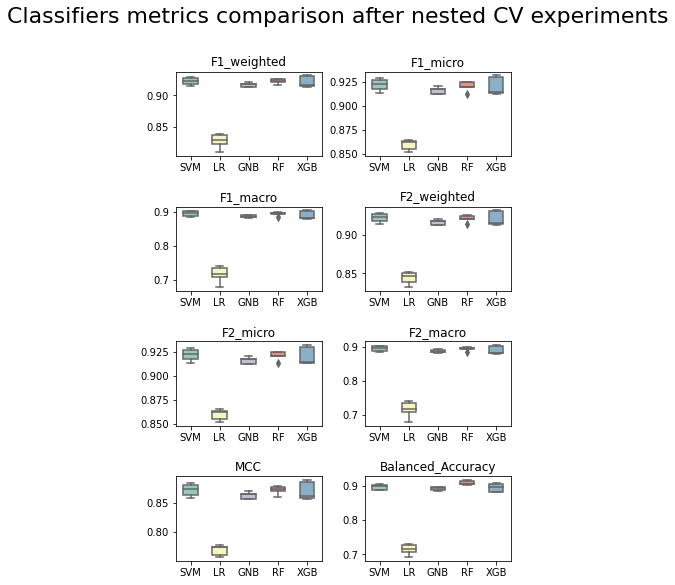

In [242]:
plot_clfs_metrics(results)

# 5-fold cross validation

In [41]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [46]:
def objective(trial):
    # Define the search space for hyperparameters
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 10, 200) 
    rf_max_depth = trial.suggest_int('rf_max_depth', 1, 3)
    rf_max_features = trial.suggest_categorical('rf_max_features', ['sqrt', 'log2', None])

    # Create the Random Forest Classifier with the suggested hyperparameters
    clf = RandomForestClassifier(n_estimators=rf_n_estimators, max_depth=rf_max_depth, 
    max_features=rf_max_features, random_state=42, n_jobs=-1)

    mcc_scorer = make_scorer(matthews_corrcoef)

    # Perform 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X, y, cv=cv, scoring=mcc_scorer)

    # Return the mean accuracy score as the objective value to be maximized
    return scores.mean()


In [47]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, show_progress_bar=True, n_jobs=-1)

best_params = study.best_params
best_value = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Value:", best_value)

  0%|          | 0/10 [00:00<?, ?it/s]

Best Hyperparameters: {'rf_n_estimators': 189, 'rf_max_depth': 3, 'rf_max_features': None}
Best Value: 0.9411717897056029


# Build final model

In [49]:
final_model = RandomForestClassifier(n_estimators=best_params['rf_n_estimators'], max_depth=best_params['rf_max_depth'], 
    max_features=best_params['rf_max_features'], random_state=42, n_jobs=-1)

final_model.fit(X, y)


RandomForestClassifier(max_depth=3, max_features=None, n_estimators=189,
                       n_jobs=-1, random_state=42)

# Test on held-out test set

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
X_test

,ORM1,ORM2,MMP3,FDCSP,S100A7,FABP7,KRT81,DCN,IL1B,AREG,...,RP11.597D13.9,MRGPRX4,C2CD4B,CTD.2012K14.8,CCR10,FAS,ADORA2B,PRMT9,PHGDH,HOXA4
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.287289,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,1.040570,1.040570,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.167167,0.0,0.000000,0.744999,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.744999,0.0
3,0.000000,0.000000,0.992541,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0.000000,0.000000,0.585273,0.0,0.000000,0.585273,0.000000,0.0,0.000000,0.585273,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.585273,0.0
1176,0.000000,0.000000,1.198240,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.198240,0.0,0.0,1.198240,0.0
1177,3.884666,0.745814,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1178,0.000000,0.000000,0.000000,0.0,2.663829,0.000000,0.000000,0.0,0.636617,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


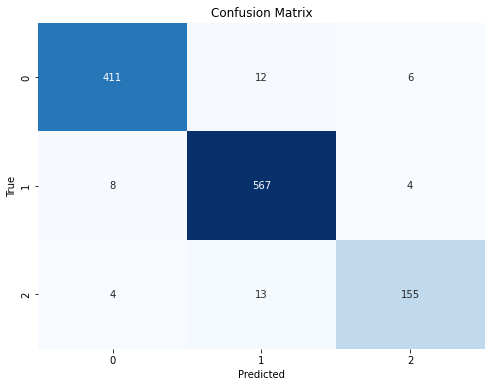

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       429
           1       0.96      0.98      0.97       579
           2       0.94      0.90      0.92       172

    accuracy                           0.96      1180
   macro avg       0.96      0.95      0.95      1180
weighted avg       0.96      0.96      0.96      1180



In [52]:
predictions = final_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
report = classification_report(y_test, predictions)

print("Classification Report:")
print(report)